# IMPORT

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from sklearn import linear_model 
from sklearn import metrics 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

# SUPERVISED LEARNING WITH IRIS DATA

In [ ]:
dataS = pd.read_csv('/content/drive/MyDrive/Intro to Python 7/data/Iris.csv')
dataS#.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
dataS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Dari data di atas didapat info berupa :
- Jumlah missing value sebesar 0 %
- Terdapat 6 kolom dengan 1 kolom berjenis data integer, 4 kolom berjenis data float dan 1 sisanya berjenis object.

In [ ]:
dataS.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


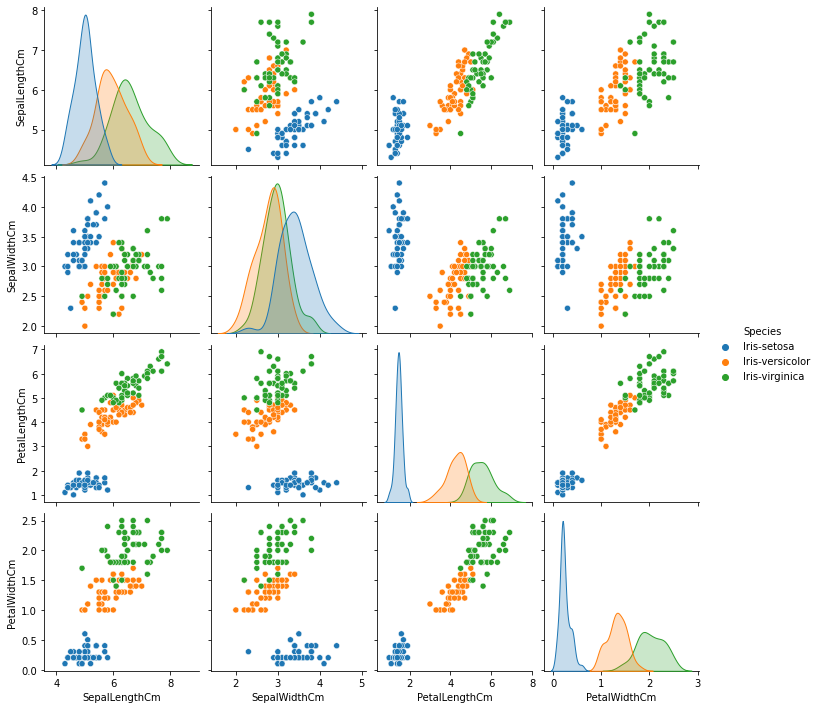

In [ ]:
sns.pairplot(dataS[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm', 'Species']], hue='Species')

In [ ]:
target = 'Species'
print(dataS[target].value_counts())
print()
print(dataS[target].value_counts() / len(dataS))

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Species, dtype: float64


## KNN Modeling

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
knn

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [ ]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dataS[feature_columns].values #features
y = dataS['Species'].values #target

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('Jumlah data train dan test, 80:20 : ', len(X_train), len(X_test))

Jumlah data train dan test, 80:20 :  120 30


In [ ]:
knn.fit(X = X_train, y = y_train) #fitting sudah selesai
y_pred_test = knn.predict(X_test) #prediksi data test
y_pred_train = knn.predict(X_train) #prediksi data train

print('Accuracy Train', knn.score(X_train, y_train)) #lgsg accuracy
print('Accuracy test', knn.score(X_test, y_test))

test_pivot = pd.crosstab(y_pred_test, y_test)
train_pivot = pd.crosstab(y_pred_train, y_train)
display(train_pivot, test_pivot)

Accuracy Train 0.95
Accuracy test 0.9666666666666667


col_0,0,1,2
row_0,,,
0,39,0,0
1,0,34,3
2,0,3,41


col_0,0,1,2
row_0,,,
0,11,0,0
1,0,12,0
2,0,1,6


In [ ]:
for i in range(1, 50, 2):
    knn_looping = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn_looping.fit(X_train, y_train)
    y_pred_t_test = knn_looping.predict(X_test) # prediksi data test
    y_pred_t_train = knn_looping.predict(X_train) # prediksi data train
    score_train = accuracy_score(y_pred_t_train, y_train) # accuracy train
    score_test = accuracy_score(y_pred_t_test, y_test) # accuracy test
    print("Max_depth", i, "Train:", score_train, "Test:", score_test)

Max_depth 1 Train: 1.0 Test: 1.0
Max_depth 3 Train: 0.95 Test: 0.9666666666666667
Max_depth 5 Train: 0.95 Test: 0.9666666666666667
Max_depth 7 Train: 0.9666666666666667 Test: 1.0
Max_depth 9 Train: 0.9583333333333334 Test: 1.0
Max_depth 11 Train: 0.9583333333333334 Test: 1.0
Max_depth 13 Train: 0.9583333333333334 Test: 1.0
Max_depth 15 Train: 0.9583333333333334 Test: 1.0
Max_depth 17 Train: 0.9583333333333334 Test: 1.0
Max_depth 19 Train: 0.95 Test: 1.0
Max_depth 21 Train: 0.95 Test: 1.0
Max_depth 23 Train: 0.9416666666666667 Test: 1.0
Max_depth 25 Train: 0.9416666666666667 Test: 1.0
Max_depth 27 Train: 0.9416666666666667 Test: 0.9333333333333333
Max_depth 29 Train: 0.9416666666666667 Test: 0.9666666666666667
Max_depth 31 Train: 0.9416666666666667 Test: 0.9333333333333333
Max_depth 33 Train: 0.9333333333333333 Test: 0.9333333333333333
Max_depth 35 Train: 0.9416666666666667 Test: 0.9333333333333333
Max_depth 37 Train: 0.9416666666666667 Test: 0.9333333333333333
Max_depth 39 Train: 0.941

In [ ]:
knn_looping.predict([[5.0,	3.6,	1.4,	0.2	]])
#5.0,	3.6,	1.4,	0.2
#5.9,	3.0,	5.1,	1.8	

array([0])

## Decision Tree

In [ ]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']

X = dataS[features] #features
y = dataS[target] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

model = DecisionTreeClassifier(max_depth = 5, random_state = 42)


In [ ]:
model.fit(X_train, y_train)
y_pred_t_test = model.predict(X_test) # prediksi data test
y_pred_t_train = model.predict(X_train) # prediksi data train

In [ ]:
print(accuracy_score(y_pred_t_train, y_train))
print(accuracy_score(y_pred_t_test, y_test))

1.0
0.9333333333333333


In [ ]:
for i in range (1, 20, 1):
  model = DecisionTreeClassifier(max_depth = i, random_state = 42)
  model.fit(X_train, y_train)
  y_pred_t_test = model.predict(X_test) # prediksi data test
  y_pred_t_train = model.predict(X_train) # prediksi data train
  score_train = accuracy_score(y_pred_t_train, y_train)
  score_test = accuracy_score(y_pred_t_test, y_test)
  print('Max_depth', i, 'Train : ', score_train, 'Test : ', score_test)

Max_depth 1 Train :  0.6666666666666666 Test :  0.6666666666666666
Max_depth 2 Train :  0.9666666666666667 Test :  0.9333333333333333
Max_depth 3 Train :  0.9833333333333333 Test :  0.9666666666666667
Max_depth 4 Train :  0.9916666666666667 Test :  0.9333333333333333
Max_depth 5 Train :  1.0 Test :  0.9333333333333333
Max_depth 6 Train :  1.0 Test :  0.9333333333333333
Max_depth 7 Train :  1.0 Test :  0.9333333333333333
Max_depth 8 Train :  1.0 Test :  0.9333333333333333
Max_depth 9 Train :  1.0 Test :  0.9333333333333333
Max_depth 10 Train :  1.0 Test :  0.9333333333333333
Max_depth 11 Train :  1.0 Test :  0.9333333333333333
Max_depth 12 Train :  1.0 Test :  0.9333333333333333
Max_depth 13 Train :  1.0 Test :  0.9333333333333333
Max_depth 14 Train :  1.0 Test :  0.9333333333333333
Max_depth 15 Train :  1.0 Test :  0.9333333333333333
Max_depth 16 Train :  1.0 Test :  0.9333333333333333
Max_depth 17 Train :  1.0 Test :  0.9333333333333333
Max_depth 18 Train :  1.0 Test :  0.933333333333

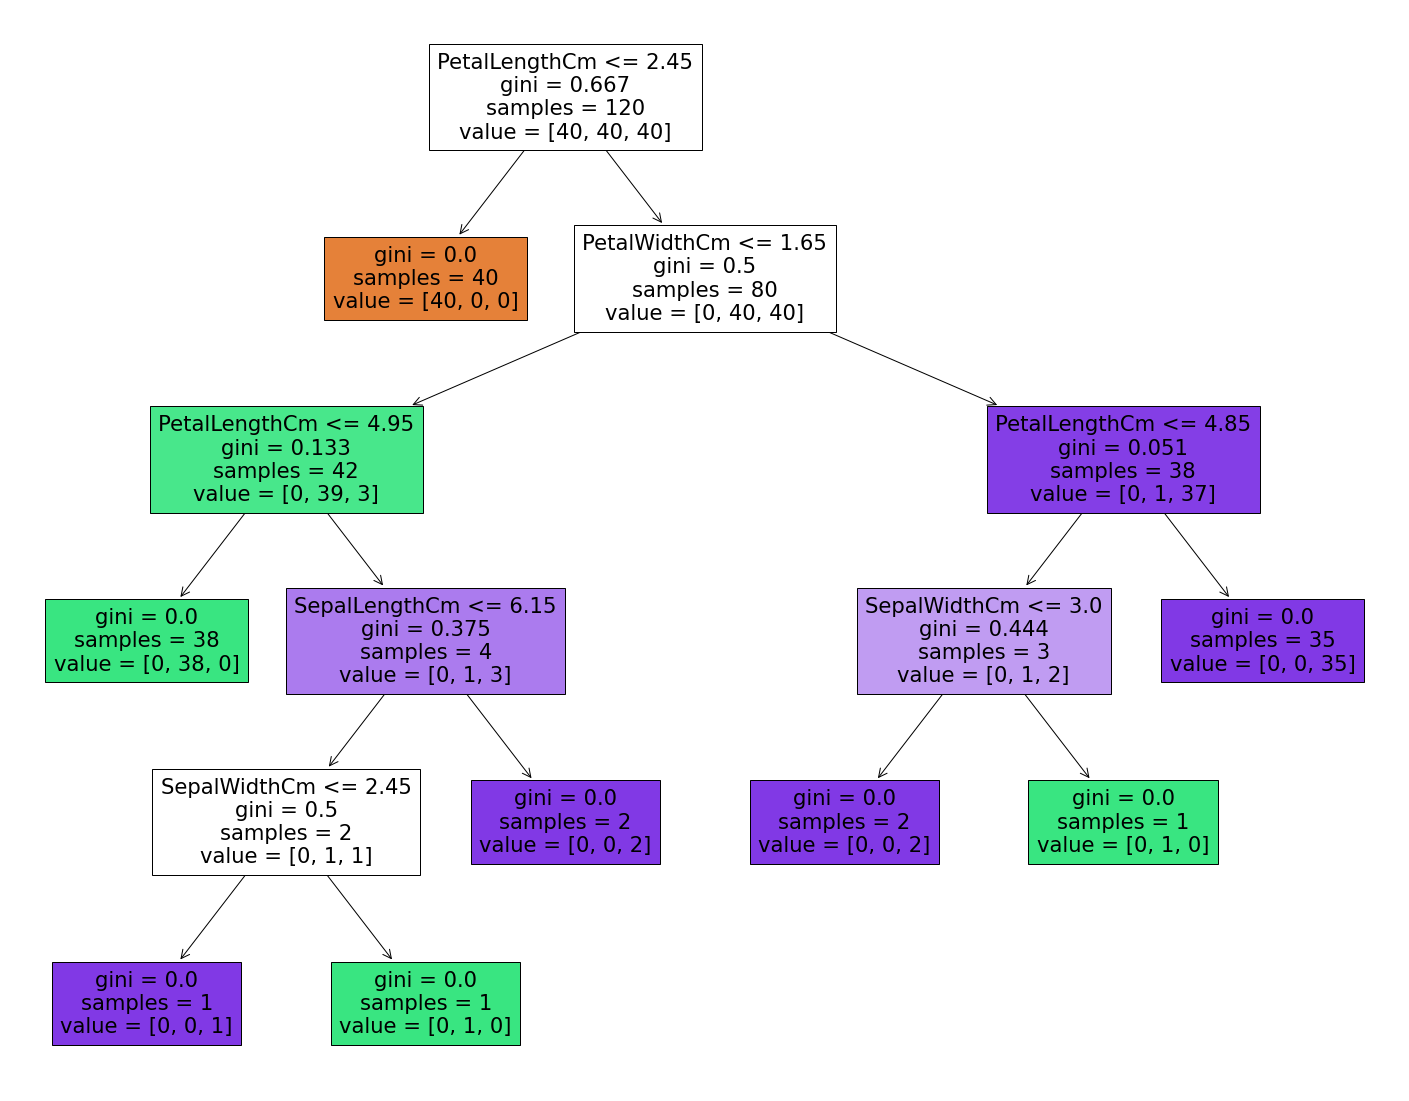

In [ ]:
fig = plt.figure(figsize = (25,20))
_ = tree.plot_tree(model, feature_names = features, filled = True)

In [ ]:
model.predict([[5.9,	3.0,	5.1,	1.8	]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array(['Iris-virginica'], dtype=object)

In [ ]:
data_baru = pd.DataFrame([[5.8,	3.0,	5.0,	1.7], [4.9,	3.7,	1.5,	0.3	]], columns = features)
data_baru['prediksi'] = model.predict(data_baru)
data_baru

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,prediksi
0,5.8,3.0,5.0,1.7,Iris-virginica
1,4.9,3.7,1.5,0.3,Iris-setosa


## Logistic Regression

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']

X = dataS[features] #ambil data tang sesuai sama fitur
X_vif = add_constant(X) #constant -> nambahin 1 dalam data frame

display(X_vif.head())
for i in range(len(X_vif.columns)):
  print(variance_inflation_factor(X_vif.values,i))

pd.Series([variance_inflation_factor(X_vif.values,i)
  for i in range(X_vif.shape[1])],
  index = X_vif.columns) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



,const,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1.0,5.1,3.5,1.4,0.2
1,1.0,4.9,3.0,1.4,0.2
2,1.0,4.7,3.2,1.3,0.2
3,1.0,4.6,3.1,1.5,0.2
4,1.0,5.0,3.6,1.4,0.2


130.98371759540507
7.103113442833282
2.099038625742089
31.39729165071975
16.141563956997683


const            130.983718
SepalLengthCm      7.103113
SepalWidthCm       2.099039
PetalLengthCm     31.397292
PetalWidthCm      16.141564
dtype: float64

In [ ]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dataS[features]
y = dataS[target]

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42, stratify =y) #42 itu konvensional
# test size = jumlah data yang akan kita jadika test (0.2 = 20%)
# random_state = ketika kita jalankan, kombinasi random tidak berubah
# initiation the model
logit_model = LogisticRegression()
logit_model.fit(X=x_train, y=y_train) #fitting sudah selesai
print('intercept ', logit_model.intercept_)
print('coeff', logit_model.coef_)

y_pred_test = logit_model.predict(x_test) # prediksi data test
y_pred_train = logit_model.predict(x_train) # prediksi data train

from sklearn.metrics import accuracy_score
print('Accuracy Score (Train)',  accuracy_score(y_pred_train, y_train))
print('Accuracy Score (Test)',  accuracy_score(y_pred_test, y_test))

intercept  [ 10.15712202   1.78337427 -11.94049628]
coeff [[-5.27184363e-01  8.17470449e-01 -2.34723612e+00 -1.00831666e+00]
 [ 5.28850262e-01 -3.01967000e-01 -1.71135223e-01 -8.46786250e-01]
 [-1.66589862e-03 -5.15503449e-01  2.51837135e+00  1.85510291e+00]]
Accuracy Score (Train) 0.975
Accuracy Score (Test) 0.9666666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# UNSUPERVISED LEARNING WITH DATA LOCATION

In [ ]:
dataUS = pd.read_excel('/content/drive/MyDrive/Intro to Python 7/Pertemuan 9-12/Project Akhir/data_location.xlsx')
dataUS

,No,Latitude,Longitude,Name Places
0,1,-6.217812,106.801503,Gelora Bung Karno Stadium
1,2,-6.171908,106.822932,National Monument
2,3,-6.300999,106.891330,Taman Mini Indonesia Indah
3,4,-6.259832,106.887996,Halim Perdana Kusuma Airport
4,5,-6.168766,106.821122,Merdeka Palace
5,6,-6.172333,106.819663,Museum Nasional
6,7,-6.171833,106.822997,Lapangan Merdeka
7,8,-6.193067,106.821731,Plaza Indonesia
8,9,-6.134333,106.807830,Museum Fatahillah
9,10,-6.287666,106.905163,Lubang Buaya


In [ ]:
dataUS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           16 non-null     int64  
 1   Latitude     16 non-null     float64
 2   Longitude    16 non-null     float64
 3   Name Places  16 non-null     object 
dtypes: float64(2), int64(1), object(1)
memory usage: 640.0+ bytes


Dari data di atas didapat info berupa :
- Jumlah missing value sebesar 0 %
- Terdapat 4 kolom dengan 1 kolom berjenis data integer, 4 kolom berjenis data float dan 1 sisanya berjenis object.

In [ ]:
dataUS.describe()

,No,Latitude,Longitude
count,16.000000,16.000000,16.000000
mean,8.500000,-6.194649,106.822494
std,4.760952,0.049601,0.052911
min,1.000000,-6.300999,106.666664
25%,4.750000,-6.209202,106.816705
50%,8.500000,-6.173170,106.821427
75%,12.250000,-6.168629,106.828239
max,16.000000,-6.129121,106.905163


In [ ]:
AIplt = px.box(dataUS, y="Latitude")
AIplt.show()

In [ ]:
AIplt = px.box(dataUS, y="Longitude")
AIplt.show()

In [ ]:
# gambaran bentang koordinat
AIplt = px.scatter(dataUS, x="Latitude", y='Longitude') 
AIplt.show()

## KMeans

In [ ]:
X = dataUS[['Latitude', 'Longitude']]
X.columns = ['Latitude', 'Longitude']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[0 1 2]


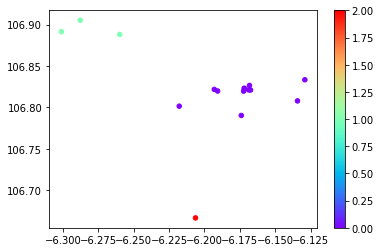

In [ ]:
from sklearn.cluster import KMeans
# initialize model
kmeans = KMeans(n_clusters=3)

# define X sm fitting model
X_train = X[['Latitude', 'Longitude']]
kmeans.fit(X_train)

# predict
X['y_cluster'] = kmeans.predict(X_train)
print(np.unique(X['y_cluster']))

# plotting scatter plot hasil prediksi
plt.scatter(X['Latitude'],X['Longitude'], c=X['y_cluster'], s=20, cmap='rainbow')
plt.colorbar()
plt.show()

[[ -6.17163013 106.81739574]
 [ -6.2828322  106.89482975]
 [ -6.20633251 106.666664  ]]


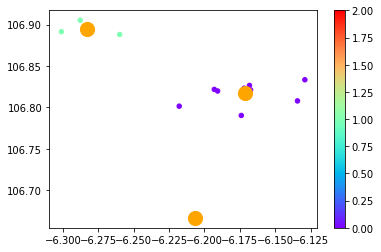

In [ ]:
# mencari pusat cluster kmeans
centers = kmeans.cluster_centers_
print(centers)

# plot titik tengah cluster (berdasarkan lokasi 2 d)
plt.scatter(X['Latitude'],X['Longitude'], c=X['y_cluster'], s=20, cmap='rainbow')
plt.colorbar()
plt.scatter(centers[:, 0], centers[:, 1], c = 'orange', s=200, alpha=1) 
plt.show()

In [ ]:
X.groupby('y_cluster')[['Latitude', 'Longitude', 'y_cluster']].agg({'Latitude':'mean', 'Longitude':'mean', 'y_cluster':'count'})

,Latitude,Longitude,y_cluster
y_cluster,,,
0,-6.171630,106.817396,12
1,-6.282832,106.894830,3
2,-6.206333,106.666664,1


In [ ]:
# prediksi hasil
Latitude = -6.288
Longitude = 106.88
kmeans.predict([[Latitude, Longitude]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



array([1], dtype=int32)